# **Modelo de preditivo de preços das ações da WEG SA**

## Obtive os dados de preços, volatilidade ao longo do tempo para a partir daí criar um modelo estatístico simples (uma regressão múltipla) que prevê os preços das ações da WEG ao longo do período considerado.

## É um modelo muito básico de predição, mas interessante.

### Carrego as bibliotecas que utilizarei:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf
import datetime as dt
import statsmodels.api as sm

In [22]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

### Baixar os dados de preços das ações da WEG:

In [4]:
def dados_preçosweg():

    # Definir o intervalo de datas: de 01/01/2014 até 31/07/2024.
    start = dt.datetime(2014, 1, 1)
    end = dt.datetime(2024, 7, 31 )

    # Lista de tickers das empresas
    tickers = ['WEGE3.SA']

    # Criar um DataFrame vazio para armazenar os dados
    df = pd.DataFrame()

    # Baixar os dados de fechamento da empresa e armazenar no DataFrame df
    for ticker in tickers:
        try:
            data = yf.download(ticker, start=start, end=end)['Close']

            # Renomear a coluna do DataFrame para incluir o ticker
            df[ticker.split('.')[0]] = data

        except Exception as e:
            print(f"Erro ao baixar dados para {ticker}: {e}")

    return df

### Colocar os dados de preços em um dataframe e plotá-los em um gráfico de linhas com duas linhas de tendência (um reta, outra curva):

In [5]:
# Obter os dados
df = dados_preçosweg()

[*********************100%%**********************]  1 of 1 completed


In [6]:
# Criar uma coluna Date_numeric que será a data em numérico, dãã
df['Date_numeric'] = df.index.astype('int64') // 10**9
print(df)

                WEGE3  Date_numeric
Date                               
2014-01-02   4.497041    1388620800
2014-01-03   4.455621    1388707200
2014-01-06   4.479289    1388966400
2014-01-07   4.476331    1389052800
2014-01-08   4.399408    1389139200
...               ...           ...
2024-07-24  46.650002    1721779200
2024-07-25  45.950001    1721865600
2024-07-26  46.919998    1721952000
2024-07-29  46.480000    1722211200
2024-07-30  45.860001    1722297600

[2630 rows x 2 columns]


## Visualizar isso em um gráfico

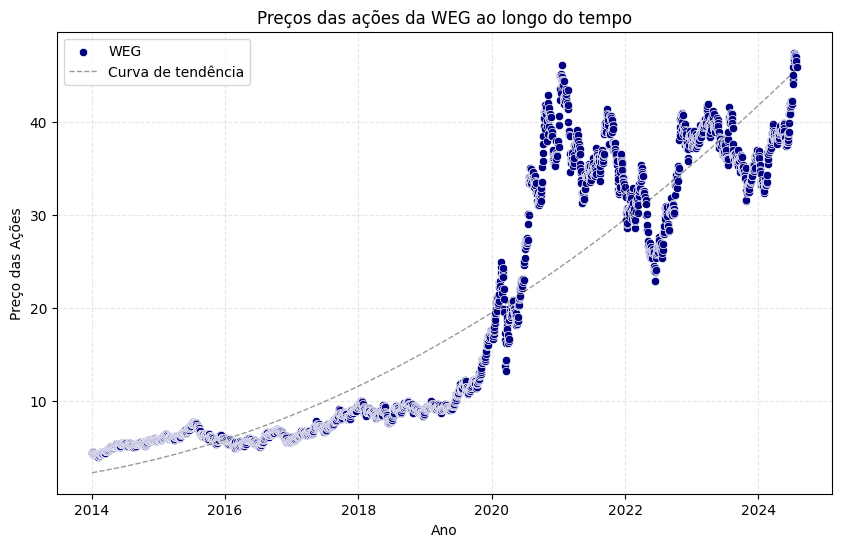

In [7]:
# Criar uma figura
plt.figure(figsize=(10, 6))

# Plotar os dados sobre os preços das ações da WEG
sns.scatterplot(data=df, x='Date', y='WEGE3', label='WEG', color='navy')

# Adicionar linha de tendência

#ajusto os dados para uma curva polinomial de grau 2 (obtendo os coeficientes)
coeficientes = np.polyfit(df['Date_numeric'], df['WEGE3'], 2)

#crio um objeto de função polinomial a partir dos coeficientes obtidos
tendencia = np.poly1d(coeficientes)

# Ploto os dados em uma curva de tendência
plt.plot(df.index, tendencia(df['Date_numeric']), label='Curva de tendência', color='black', linestyle='--', linewidth=1, alpha = 0.4)

# Nomear os eixos do gráfico
plt.xlabel('Ano')
plt.ylabel('Preço das Ações')

# Título do gráfico
plt.title('Preços das ações da WEG ao longo do tempo')

# Mostrar a legenda no gráfico
plt.legend()

# Mostrar as grades no gráfico
plt.grid(True, alpha = 0.3, linestyle = '--')

# Mostrar o gráfico
plt.show()

In [8]:
df.head()

,WEGE3,Date_numeric
Date,,
2014-01-02,4.497041,1388620800
2014-01-03,4.455621,1388707200
2014-01-06,4.479289,1388966400
2014-01-07,4.476331,1389052800
2014-01-08,4.399408,1389139200


## Gráfico interativo

In [9]:
fig0 = px.line(df,
               x=df.index,
               y='WEGE3',
               title='Preços das ações da WEG ao longo do tempo',
               labels={'Date': 'Data', 'WEGE3': 'Preços'},
               template='plotly_white',
               width=1000,
               height=600,
               line_shape='linear')

# cor da linha
fig0.update_traces(line_color='navy')

# Mostrar o gráfico
fig0.show()


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


## Distribuição dos preços em todo o período (2014 a 2024):

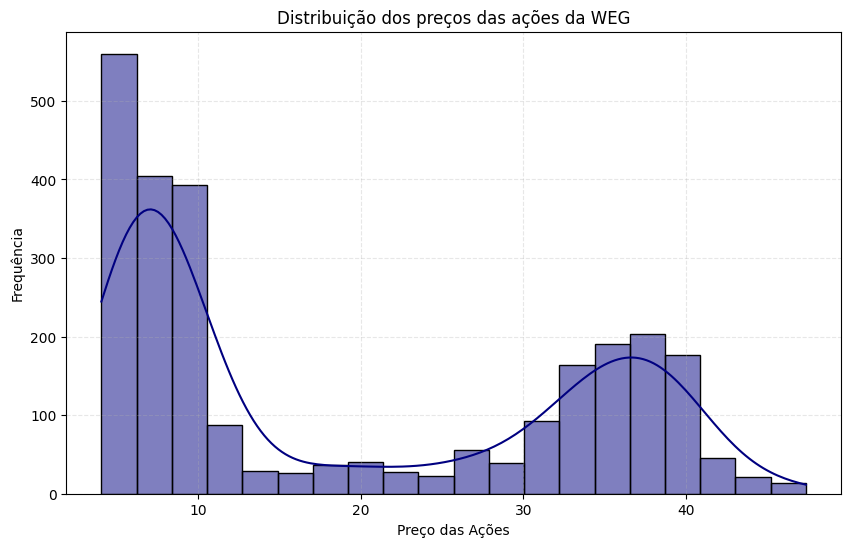

In [10]:
#vou criar uma distribuição com seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['WEGE3'], bins=20, kde=True, color='navy')

# Nomear os eixos do gráfico
plt.xlabel('Preço das Ações')
plt.ylabel('Frequência')

#mostrar grades
plt.grid(True, alpha = 0.3, linestyle = '--')

# Título do gráfico
plt.title('Distribuição dos preços das ações da WEG')

# Mostrar o gráfico
plt.show()

## Distribuição dos preços até 2019

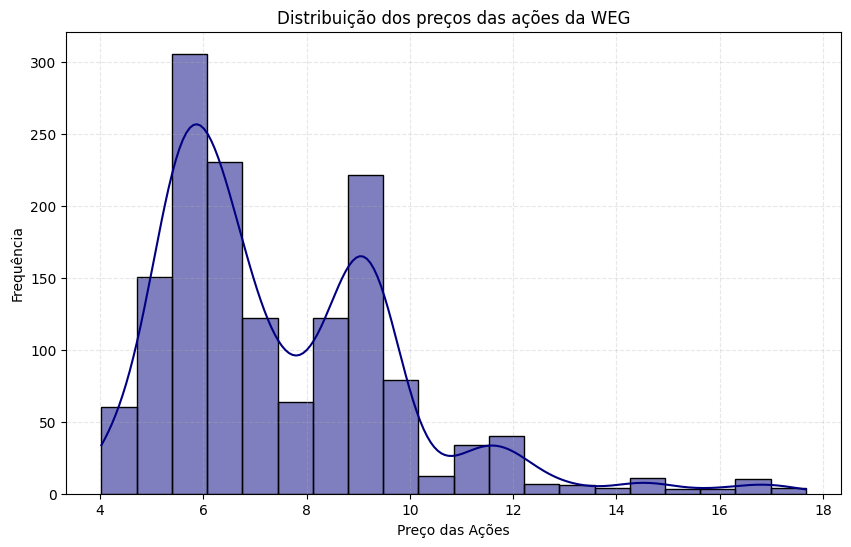

In [ ]:
# vou colocar um gráfico de distribuição até 2019
plt.figure(figsize=(10, 6))
sns.histplot(df['WEGE3'][df.index.year <= 2019], bins=20, kde=True, color='navy')

# Nomear os eixos do gráfico
plt.xlabel('Preço das Ações')
plt.ylabel('Frequência')

#mostrar grades
plt.grid(True, alpha = 0.3, linestyle = '--')

# Título do gráfico
plt.title('Distribuição dos preços das ações da WEG')

# Mostrar o gráfico
plt.show()

## Distribuição dos preços após 2019 até agora

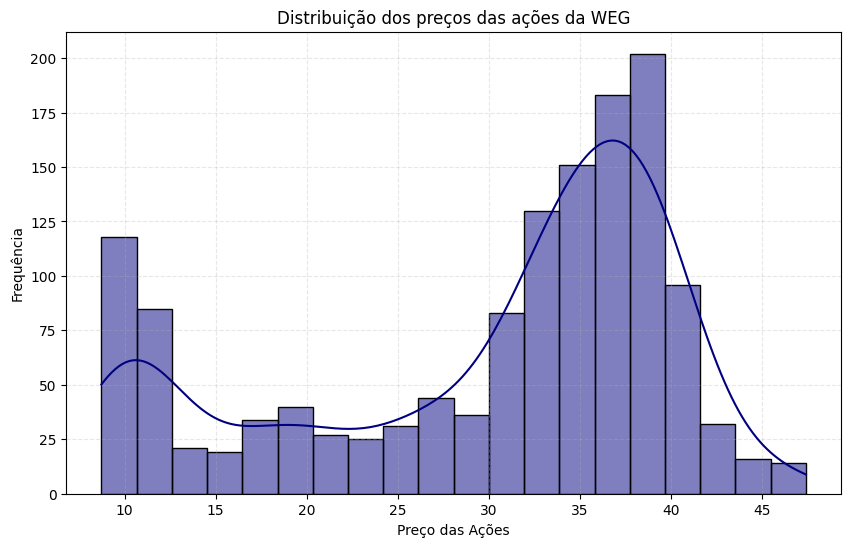

In [ ]:
#vou colocar um gráfico de distribuição a partir do ano de 2019
plt.figure(figsize=(10, 6))
sns.histplot(df['WEGE3'][df.index.year >= 2019], bins=20, kde=True, color='navy')

# Nomear os eixos do gráfico
plt.xlabel('Preço das Ações')
plt.ylabel('Frequência')

#mostrar grades
plt.grid(True, alpha = 0.3, linestyle = '--')

# Título do gráfico
plt.title('Distribuição dos preços das ações da WEG')

# Mostrar o gráfico
plt.show()

## O patamar de preços mais comuns vem subindo

In [11]:
from sklearn.model_selection import train_test_split

## Ver como o dataframe está agora

In [12]:
#vou colocar o index como coluna Date
df.reset_index(inplace=True)

#vou colocar como datetime
df['Date'] = pd.to_datetime(df['Date'])
print(df)

           Date      WEGE3  Date_numeric
0    2014-01-02   4.497041    1388620800
1    2014-01-03   4.455621    1388707200
2    2014-01-06   4.479289    1388966400
3    2014-01-07   4.476331    1389052800
4    2014-01-08   4.399408    1389139200
...         ...        ...           ...
2625 2024-07-24  46.650002    1721779200
2626 2024-07-25  45.950001    1721865600
2627 2024-07-26  46.919998    1721952000
2628 2024-07-29  46.480000    1722211200
2629 2024-07-30  45.860001    1722297600

[2630 rows x 3 columns]


## Calcular a média móvel de 50 em 50 cotações

In [13]:
# Calcular a média móvel de 50 dias para a coluna 'WEGE3'
df['SMA_50'] = df['WEGE3'].rolling(window=50).mean()

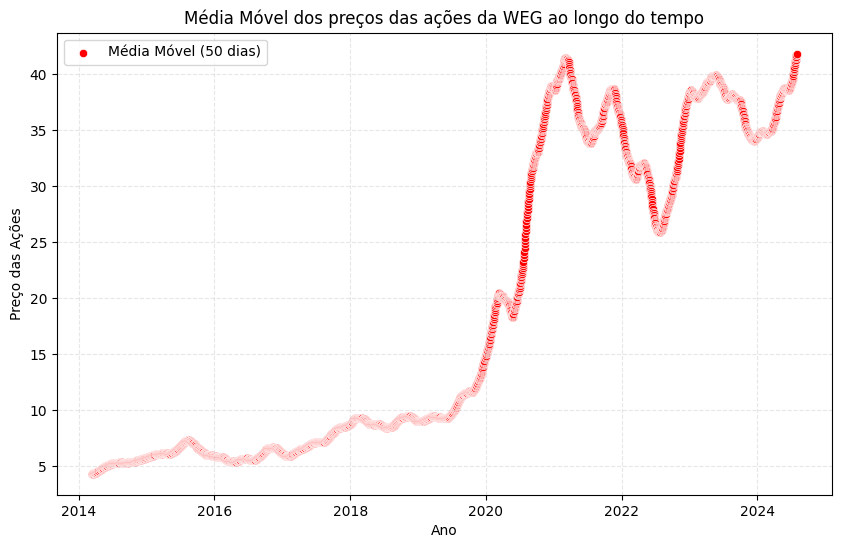

In [ ]:
#vou colocar a média móvel em um gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Date', y='SMA_50', label='Média Móvel (50 dias)', color='red')
plt.xlabel('Ano')
plt.ylabel('Preço das Ações')
plt.title('Média Móvel dos preços das ações da WEG ao longo do tempo')
plt.legend()
plt.grid(True, alpha = 0.3, linestyle = '--')
plt.show()

## Vou calcular a volatilidade:

In [14]:
df['Volatility'] = df['WEGE3'].rolling(window=50).std()

In [ ]:
#ver como o df ficou
print(df)

           Date      WEGE3  Date_numeric   SMA_50  Volatility
0    2014-01-02   4.497041    1388620800      NaN         NaN
1    2014-01-03   4.455621    1388707200      NaN         NaN
2    2014-01-06   4.479289    1388966400      NaN         NaN
3    2014-01-07   4.476331    1389052800      NaN         NaN
4    2014-01-08   4.399408    1389139200      NaN         NaN
...         ...        ...           ...      ...         ...
2625 2024-07-24  46.650002    1721779200  41.2734    3.294335
2626 2024-07-25  45.950001    1721865600  41.4000    3.350647
2627 2024-07-26  46.919998    1721952000  41.5464    3.429386
2628 2024-07-29  46.480000    1722211200  41.6832    3.487716
2629 2024-07-30  45.860001    1722297600  41.8034    3.526594

[2630 rows x 5 columns]


## Veja a volatilidade

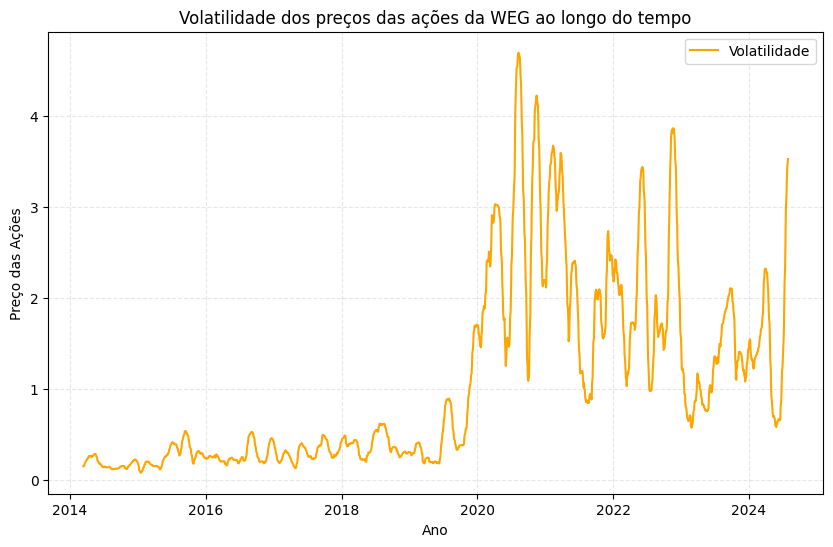

In [15]:
#vou colocar a volatilidade em um gráfico
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Date', y='Volatility', label='Volatilidade', color='orange')

# Nomear os eixos do gráfico
plt.xlabel('Ano')
plt.ylabel('Preço das Ações')
plt.title('Volatilidade dos preços das ações da WEG ao longo do tempo')
plt.legend()
plt.grid(True, alpha = 0.3, linestyle = '--')
plt.show()

## Veja como a volatilidade era baixíssima até a pandemia. Agora ela parece querer começar a se estabiliza como era antes, mas ainda não conseguiu.

## Vou criar o modelo preditivo

In [23]:
df = df.dropna()  # Remover quaisquer valores nan

In [24]:
# Divisão dos dados:

# Vou usar 80% dos dados para treinamento e 20% para teste.
train_size = int(len(df) * 0.8)

# Separa os dados em treinamento e teste
train_data = df[:train_size]
test_data = df[train_size:]

In [25]:
# Treinamento do modelo:

#Vou lidar com as variáveis que serão "treinadas":

# Separo as colunas (SMA_50 e Volatility) como variáveis independentes (X's) e armazeno em _train
# e a coluna WEGE3 como variável dependente (y) nos dados de teste, armazeno isso em y_train
X_train = train_data[['SMA_50', 'Volatility']]
y_train = train_data['WEGE3']

# Vou estimar por Modelo de regressão linear
modelo = LinearRegression()

#Com o comando modelo.fit eu treino o modelo (com base em uma regressão já colocada)
modelo.fit(X_train, y_train)

# Previsões:

#Aqui eu lido com as variáveis que eu usarei como "teste"
# Novamente, Separo as colunas (SMA_50 e Volatility) como variáveis independentes (X)
# e a coluna WEGE3 como variável dependente (y) nos dados de teste.
X_test = test_data[['SMA_50', 'Volatility']]
y_test = test_data['WEGE3']

# Uso o modelo treinado para fazer previsões nos dados de teste (X_test),
# armazenando as previsões em 'predictions'
predictions = modelo.predict(X_test)

# Avaliação do modelo:

#Calcula o erro quadrático médio (RMSE) e o erro absoluto médio (MAE) para avaliar a precisão do modelo
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)

#Escreve os dois na tela
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

RMSE: 2.5501483017852777
MAE: 2.091737576245283


## Veja como o dataframe está agora:

In [26]:
test_data = test_data.copy()
print(test_data)

           Date      WEGE3  Date_numeric   SMA_50  Volatility
2113 2022-07-06  27.100000    1657065600  26.3112    1.695403
2114 2022-07-07  27.610001    1657152000  26.2308    1.524756
2115 2022-07-08  27.270000    1657238400  26.1536    1.360514
2116 2022-07-11  26.580000    1657497600  26.0832    1.237665
2117 2022-07-12  26.590000    1657584000  26.0362    1.169720
...         ...        ...           ...      ...         ...
2625 2024-07-24  46.650002    1721779200  41.2734    3.294335
2626 2024-07-25  45.950001    1721865600  41.4000    3.350647
2627 2024-07-26  46.919998    1721952000  41.5464    3.429386
2628 2024-07-29  46.480000    1722211200  41.6832    3.487716
2629 2024-07-30  45.860001    1722297600  41.8034    3.526594

[517 rows x 5 columns]


## Vou plotar no gráfico os dados com a variação real e a variação que o modelo previu para o período

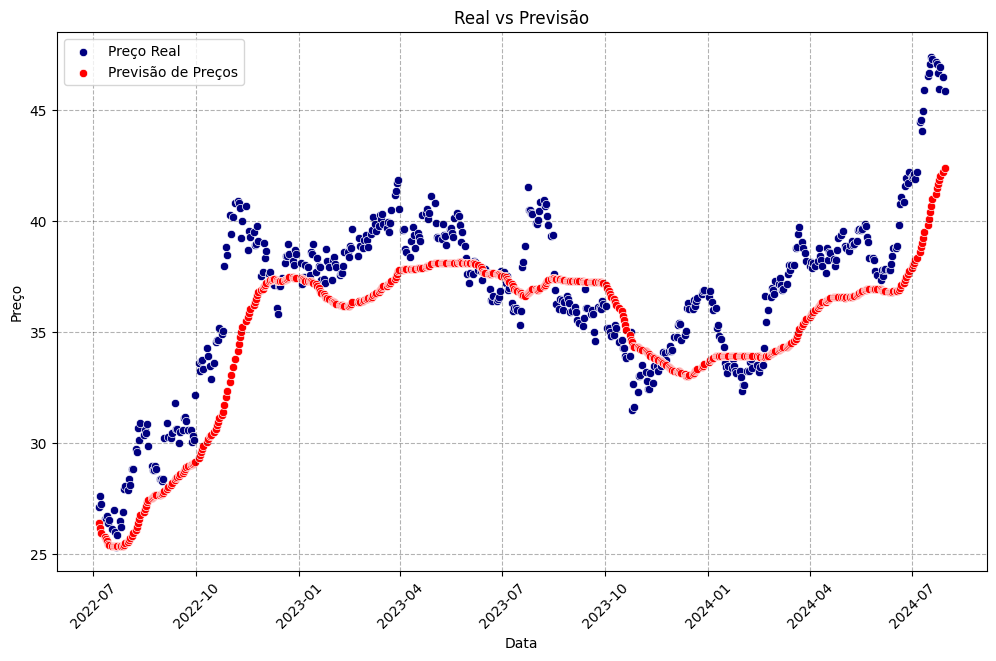

In [27]:
# Visualização dos resultados com Seaborn
plt.figure(figsize=(12, 7))

#Gráfico dos dados reais
sns.scatterplot(x=test_data['Date'], y=y_test, label='Preço Real', color='navy')

#Gráfico das previsões
sns.scatterplot(x=test_data['Date'], y=predictions, label='Previsão de Preços', color='red')

# Nomear os eixos do gráfico
plt.xlabel('Data')
plt.ylabel('Preço')
plt.title('Real vs Previsão')

#Rotaciona os rótulos do eixo x
plt.xticks(rotation=45)

# Mostrar a legenda no gráfico
plt.legend()

#Mostrar grades
plt.grid(True, alpha = 0.3, linestyle = '--', color = 'black')
plt.show()



---



## Rodei uma modelagem para testar se o modelo está ou não sobreajustado. Isso significaria que ele é ajustado para modelar os dados, mas não é bom para prever os dados futuros de preços

## Obtive isso:
Treino MSE: 3.6428

Teste MSE: 3.9048

Treino R²: 0.9809

Teste R²: 0.9797

CV MSE: 4.3608

## **Interpretação disso:**

## Não há uma evidência clara de overfitting (modelagem sobreajustada): O modelo apresenta um desempenho consistente em termos de R² entre treinamento e teste, e a diferença entre os MSEs de treinamento e teste não é muito grande.

##Isso é um possível sinal de subajuste ou necessidade de ajuste: O MSE da validação cruzada mais alto sugere que há espaço para melhorias na generalização.

## Na verdade esse subajuste apenas mostra que outras variáveis explicam os preços das ações da empresa. A modelagem rodada não comporta todas essas variáveis. Não era a intenção. A intenção de fato é criar uma modelagem muito muito básica mesmo



---



---



## Vou criar uma modelagem estatística de Regressão Logística para calcular a probabilidade do preço da ação cair com base nesses dois fatores

In [28]:
# Criar a variável binária Price_Drop
df['Price_Drop'] = np.where(df['WEGE3'].shift(-1) < df['WEGE3'], 1, 0)

In [29]:
# Variáveis independentes
X = df[['SMA_50', 'Volatility']]
# Adicionar constante para o modelo
X = sm.add_constant(X)

# Variável dependente
y = df['Price_Drop']

# Ajustar o modelo de regressão logística
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Resumo do modelo
print(result.summary())

# Prever a probabilidade de queda no preço da ação
df['Predicted_Prob'] = result.predict(X)

# Visualizar as previsões
print(df[['WEGE3', 'Price_Drop', 'Predicted_Prob']].head())

Optimization terminated successfully.
         Current function value: 0.690608
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:             Price_Drop   No. Observations:                 2581
Model:                          Logit   Df Residuals:                     2578
Method:                           MLE   Df Model:                            2
Date:                Wed, 07 Aug 2024   Pseudo R-squ.:                0.002234
Time:                        15:03:25   Log-Likelihood:                -1782.5
converged:                       True   LL-Null:                       -1786.5
Covariance Type:            nonrobust   LLR p-value:                   0.01848
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2430      0.067     -3.607      0.000      -0.375      -0.111
SMA_50         0.0084      0.

## Analisando o resultado acima:

## O Pseudo R-squ. foi de 0.002092 -- o que é muito pequeno. Valores mais próximos de 1 indicam melhor ajuste. Aqui, 0.002092 é muito muit baixo, assim, podemos cravar que o modelo não explica bem a variação na variável dependente (queda de preços). Essa é uma medida de quão bem as variáveis independentes (volatilidade e média móvel) explicam a variabilidade da variável dependente (preço da ação). Dessa forma, conclui-se que a volatilidade e a média dos preços anteriores não explicam bem se os preços futuros caírão (e, consequentemente, não explica bem se eles subirão)

## - Log-Likelihood: -1779.1
### O valor da log-verossimilhança do modelo ajustado. Valores mais altos (menos negativos) indicam melhor ajuste. Ou seja, o ajuste é terrível. Indicando que não se pode prever bem quedas de preços a partir das variáveis explicativas consideradas no modelo.

## Veja a análise dos coeficientes obtidos:
## - const: A constante (intercepto) é significativa (p < 0.05), indicando que, quando SMA_50 e Volatility são zero, a log-odds de uma queda no preço é -0.2402.

##- SMA_50: Um coeficiente positivo sugere que um aumento na média móvel de 50 dias (SMA_50) está associado a um aumento na log-odds de um Price_Drop. No caso, obtivemos 0.0083. O que é positivo, mas bem pequeno. Porém, como o p-valor é 0.049, este coeficiente é marginalmente significativo ao nível de 5%, sugerindo que um aumento na média móvel de 50 dias (SMA_50) está associado a um aumento na log-odds de um Price_Drop. Um aumento da média móvel está relacionado a uma queda futura nos preços. É como o Carpini disse: "Quanto mais a gente ganha, mais próximo da derrota"

## - Volatility: O coeficiente de Volatility não é significativo (p > 0.05), indicando que a volatilidade não tem um efeito estatisticamente significativo na probabilidade de queda no preço da ação.

## **É apenas um jeito bonito de dizer que não tem como prever o futuro!**



---



---



## Mesmo assim, lá vamos nós: agora sim vou para as previsões com base em um modelo baseado nos dados anteriores.

## Vou pegar esses dados e deduzir, estatisticamente, onde os preços das ações da empresa deveriam estar dado que vou modelar que esses preços dependem, na média, da média móvel dos preços anteriores e da volatilidade móvel

## Dessa forma, quero utilizar esse modelo criado para prever os preços futuros das ações da WEG até o final do ano. Note que o próximo modelo será muito simplificado, irrealista e vai prever mal os resultados. Mas é só para começar.

In [30]:
# Novo treinamento do modelo com todos os dados

#especifico as variáveis independentes e as dependentes
X = df[['SMA_50', 'Volatility']]
y = df['WEGE3']

#crio o modelo de regressão
model = LinearRegression()
model.fit(X, y)

# Gero datas futuras até janeiro de 2025
dates_future = pd.date_range(start=df['Date'].max(), periods=200, freq='D')

# DataFrame para armazenar as datas futuras
future_data = pd.DataFrame({'Date': dates_future})

# Calcular SMA_50 e Volatility para datas futuras
# Como não temos dados reais futuros, vamos assumir que SMA_50 e Volatility para as datas futuras serão iguais ao último valor conhecido
# Este é um método simples e pode ser melhorado com uma abordagem mais robusta, mas por hora vamos usar isso.

last_sma_50 = df['SMA_50'].iloc[-1]
last_volatility = df['Volatility'].iloc[-1]

future_data['SMA_50'] = last_sma_50
future_data['Volatility'] = last_volatility

# Realizar as previsões para as datas futuras
X_future = future_data[['SMA_50', 'Volatility']]
predictions_future = model.predict(X_future)

# Adicionar as previsões ao DataFrame das datas futuras
future_data['Predicted_WEGE3'] = predictions_future

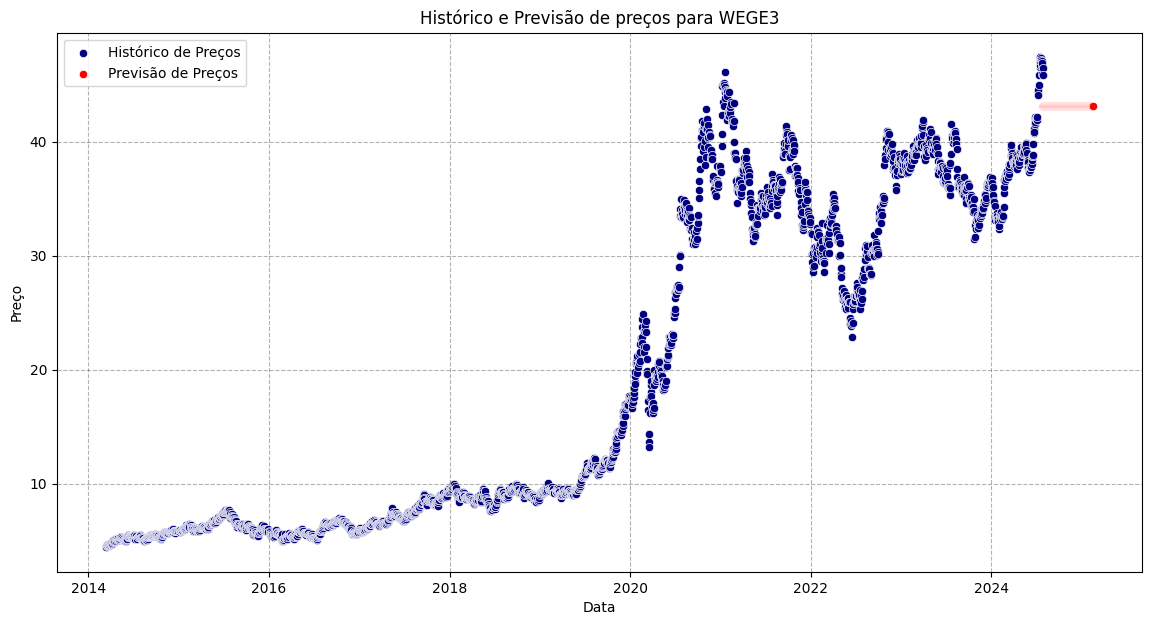

In [31]:
# Visualização dos resultados
plt.figure(figsize=(14, 7))

#vou plotar os dados os dados e a previsão
sns.scatterplot(x=df['Date'], y=df['WEGE3'], label='Histórico de Preços', color='navy')
sns.scatterplot(x=future_data['Date'], y=future_data['Predicted_WEGE3'], label='Previsão de Preços', color='red')

# Nomear os eixos do gráfico
plt.xlabel('Data')
plt.ylabel('Preço')
plt.title('Histórico e Previsão de preços para WEGE3')
plt.legend()
plt.grid(True, alpha = 0.3, linestyle = '--', color = 'black')
plt.show()

## Veja que ficou péssimo.

## A seguir vou continuar treinando um modelo que se ajuste melhor.



---



## Vou criar um teste para verificar qual é o melhor modelo para se utilizar nesse caso.

In [37]:
# Passo 1: Definir variáveis independentes (X) e dependente (y)
X = df[["SMA_50", "Volatility"]]
y = df["WEGE3"]

# Passo 2: Tratar valores ausentes
# Preencher NaNs com a média das colunas
X = X.fillna(X.mean())

# Passo 3: Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Passo 4: Definir os modelos de regressão
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "SVR": SVR(),
    "Random Forest": RandomForestRegressor()
}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

# Passo 5: Treinar e avaliar os modelos
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores


{'Linear Regression': 0.9831980739783437,
 'Ridge': 0.9831978654155615,
 'Lasso': 0.9817253279123527,
 'ElasticNet': 0.9817253274874843,
 'SVR': 0.9819318073857136,
 'Random Forest': 0.9920519429245175}

## O modelo de Random Forest teve o melhor score. Vou usar ele.

## Treinando o modelo:

In [38]:
# Passo 1: Definir variáveis independentes (X) e dependente (y)
X = df[["SMA_50", "Volatility"]]
y = df["WEGE3"]

# Passo 2: Tratar valores ausentes
X = X.fillna(X.mean())

# Passo 3: Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Passo 4: Definir e treinar o modelo
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Passo 5: Avaliar o modelo
model_score = model.score(X_test, y_test)

0.9919580847319499

## Faço as previsões feitas pelo modelo treinado e armazeno em y_pred

In [39]:
# Passo 6: Fazer previsões com o modelo treinado
y_pred = model.predict(X_test)

In [43]:
# Passo 7: Criar um DataFrame com as datas, valores reais e previsões
results_df = pd.DataFrame({
    'Date': X_test.index,  # Assumindo que o índice do seu DataFrame é a data
    'Real': y_test,
    'Predicted': y_pred
})

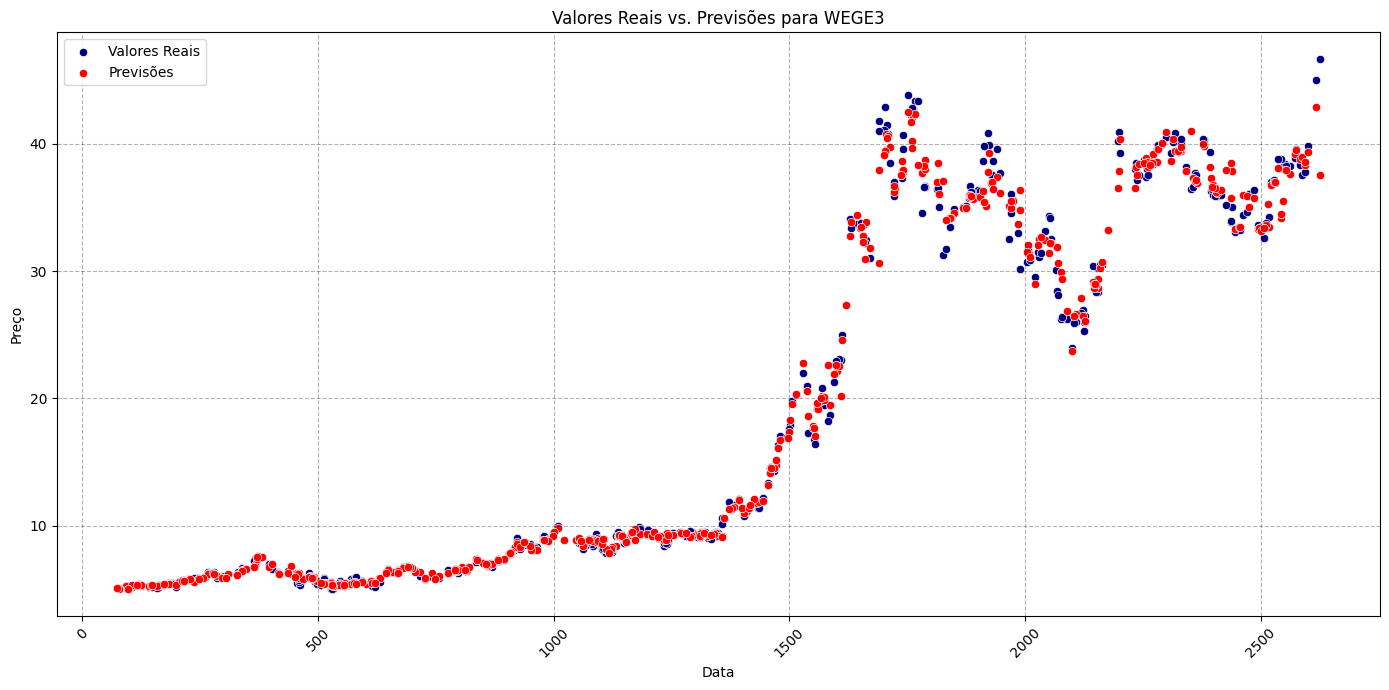

In [44]:
# Passo 8: Visualização dos resultados
plt.figure(figsize=(14, 7))

# Plotar os dados reais e as previsões
sns.scatterplot(x='Date', y='Real', data=results_df, label='Valores Reais', color='navy')
sns.scatterplot(x='Date', y='Predicted', data=results_df, label='Previsões', color='red')

# Nomear os eixos do gráfico
plt.xlabel('Data')
plt.ylabel('Preço')
plt.title('Valores Reais vs. Previsões para WEGE3')
plt.legend()
plt.grid(True, alpha=0.3, linestyle='--', color='black')

# Rotacionar as labels do eixo x para melhor visualização
plt.xticks(rotation=45)

plt.tight_layout()  # Ajusta o layout para evitar cortes no gráfico
plt.show()

## Veja que esse modelo ficou mais ajustado que o anterior.

## Prever o futuro através do modelo escolhido. Sim, vou tentar prever o caminho das próximas 100 cotações.

In [49]:
from sklearn.ensemble import RandomForestRegressor

# Passo 1: Preparar os dados
X = df[["SMA_50", "Volatility"]]
y = df["WEGE3"]

# Tratar valores ausentes
X = X.fillna(X.mean())

# Passo 2: Treinar o modelo com todos os dados disponíveis
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Passo 3: Criar dados futuros para previsão
last_date = pd.to_datetime(df['Date'].iloc[-1])
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=100)

# Inicializar o DataFrame futuro
future_data = pd.DataFrame(index=future_dates, columns=["SMA_50", "Volatility"])

# Preencher o DataFrame futuro com os últimos valores conhecidos
future_data["SMA_50"] = X["SMA_50"].iloc[-1]
future_data["Volatility"] = X["Volatility"].iloc[-1]

# Passo 4: Fazer previsões
future_predictions = model.predict(future_data)

# Passo 5: Criar DataFrame com previsões
future_df = pd.DataFrame({
    "Date": future_dates,
    "Predicted_WEGE3": future_predictions
})


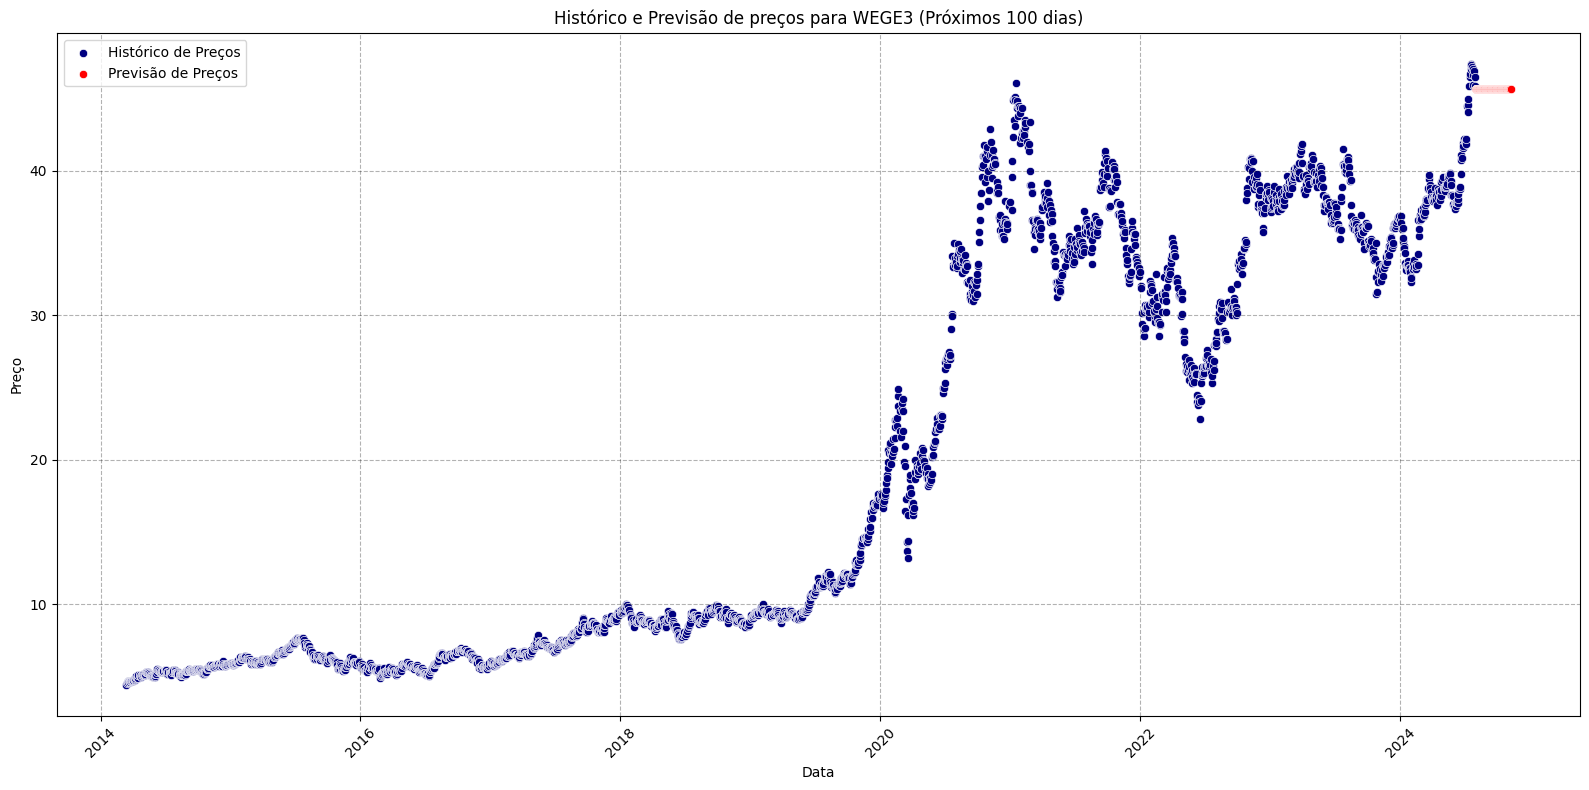

In [50]:
# Passo 6: Visualização
plt.figure(figsize=(16, 8))

# Plotar dados históricos
sns.scatterplot(x=pd.to_datetime(df["Date"]), y=df["WEGE3"], label='Histórico de Preços', color='navy')

# Plotar previsões futuras
sns.scatterplot(x=future_df["Date"], y=future_df["Predicted_WEGE3"], label='Previsão de Preços', color='red')

plt.xlabel('Data')
plt.ylabel('Preço')
plt.title('Histórico e Previsão de preços para WEGE3 (Próximos 100 dias)')
plt.legend()
plt.grid(True, alpha=0.3, linestyle='--', color='black')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Segundo a modelagem os preços das ações dessa empresa podem bem ser até que bem previstos por fatores como os crescimentos anteriores dos preços das ações e pelo grau de volatilidade desses preços. Do mesmo modo, porém, esse modelo demonstra que outros fatores influenciam na cotação de preços da empresa.

## Vou enumerar alguns fatores: além dos resultados dos medidores de desempenho da própria empresa, fatores macroeconômicos internos e externos e uma outra centena de variáveis também influenciam esses preços.

## Veja que isso não contradiz o resultado da regressão logística. A regressão naquele caso tentou mostrar a probabilidade de os preços caírem num futuro com base nos fatores colocados. No caso do modelo preditivo tentou-se modelar os preços da empresa dado a explicação deles por meio dos dois fatores considerados (média móvel e volatilidade) e comparar isso com os preços reais verificados no período 😉

#**END.!**